In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import os

In [2]:
path = '/home/investigator/mariandbt/python/data/'
path = path + '20230119/'

filename = os.path.join(path, 'Acq_LED1.02V_PMT5.5V_gan0.8.txt')

with open(filename) as f:
    data_102 = np.loadtxt(f)

In [3]:
np.shape(data_102)

(9056000, 3)

In [4]:
len(np.where(data_102[:, 0] == 0.)[0]) #, data_pmt_led[:, 0].max()

9056

In [5]:
np.where(data_102[:, 0] == 0.)[0][1998]

1998000

note: the way the data is stored when using only ONE FILE is the following:
- column 0 is just an index (x-axis if you  will), while columns 1, 2, 3 correspond to data from differnt channels
- each column stores data from MULTIPLE FRAMES
- each frame has 1000 points, so in column 0 you can see how after 999 it resets to 0 when the frame changes

In [24]:
data_slice = data_102[:500, :]
data_slice[0]

array([ 0.      , -6.50034 , -0.366217])

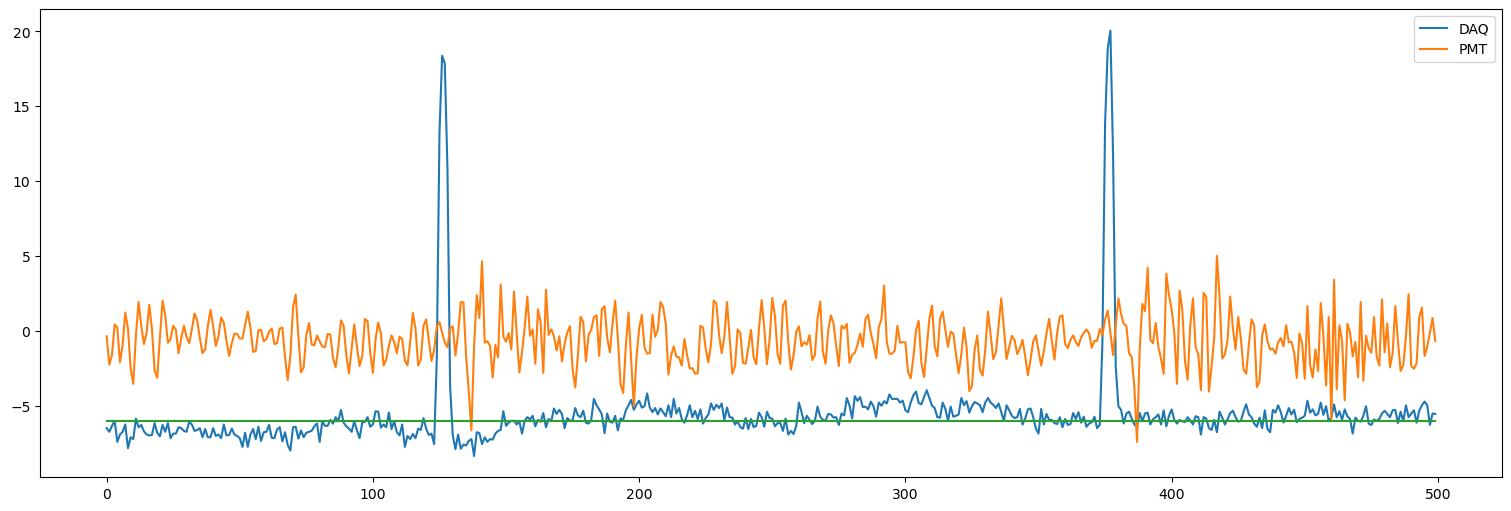

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

x_ax = data_102[:500, 0]
    
# for i in range(1, 4):
#     ax.plot(data_pmt_led[:1000, 0], data_pmt_led[:1000, i])
# #     ax.set_aspect('equal')

# ax.plot(data_102[:1000, 0], data_102[:1000, 1], label = 'DAQ')
# ax.plot(data_102[:1000, 0], data_102[:1000, 2], label = 'PMT')
ax.plot(x_ax, data_102[:500, 1], label = 'DAQ')
ax.plot(x_ax, data_102[:500, 2], label = 'PMT')
ax.plot(x_ax, -6*np.ones(len(x_ax)))
ax.legend(loc = 'best')

In [7]:
# Fitting distributions to define

# note: pdf are normilized to 1 so we have yo add an amplitude param

def gauss_neg(x, a,  mu, sigma):
    return -a*stats.norm.pdf(x, mu, sigma) 

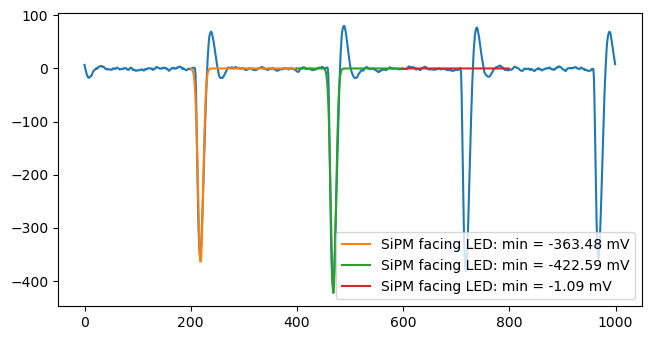

In [8]:
fig, ax = plt.subplots(1,1, constrained_layout=True)

data_slice = data_sipm_led[:1000, 2]
ax.plot(data_slice)
ax.set_aspect('equal')

# offset = 215
# offset = 213
offset = 200

for i in range(1, 4):

#     data_region = data_slice[220*i:200*(i+1)]
#     data_region = data_slice[220*i:220*(i+1)]
    data_region = data_slice[offset*i:offset*(i+1)]
    x_ax = range(len(data_region))

    # negative gaussian fit
    popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#     popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
    a, mu, sigma = popt
    best_fit_line = gauss_neg(x_ax, a, mu, sigma)

#     x_ax = range(220*i, len(data_region) + 220*i)
    x_ax = range(offset*i, len(data_region) + offset*i)

    ax.plot(x_ax, best_fit_line, label='SiPM facing LED: min = %.2f mV' %(best_fit_line.min()))
    ax.legend(fontsize=10, loc='best')


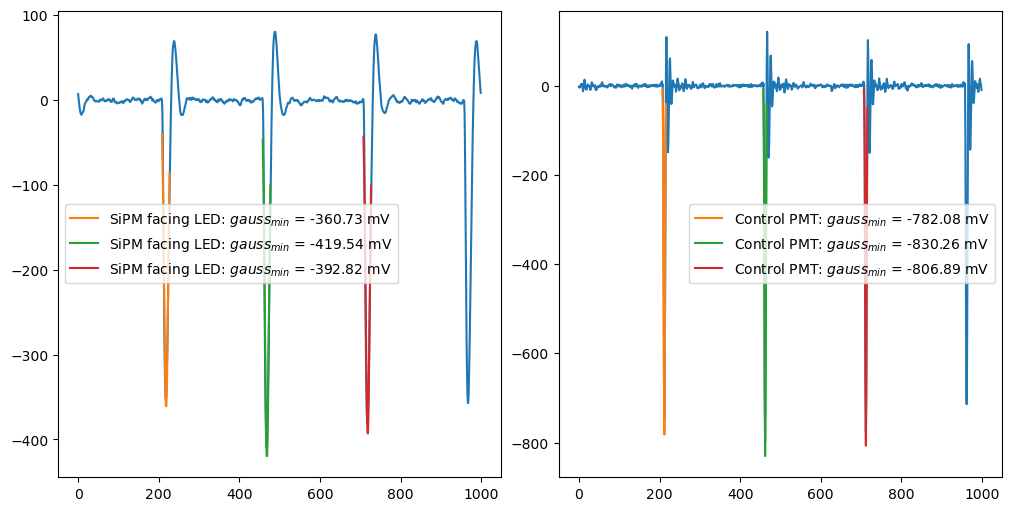

In [14]:
# fig, ax = plt.subplots(1,2, constrained_layout=True)
fig, ax = plt.subplots(1,2, figsize=(10,5), constrained_layout=True)
# fig.set_figheight(15)
# fig.set_figwidth(15)
# ax.set_aspect('equal')

frame = 0
#_______________________________________________SiPM____________________________________________________

# data_slice = data_sipm_led[:1000, 2]
data_slice = data_sipm_led[1000*(frame):1000*(frame + 1), 2]
ax[0].plot(data_slice)

fit_range = 10

for i in range(1, 4):

#     data_region = data_slice[220*i:200*(i+1)]
#     data_region = data_slice[220*i:220*(i+1)]
    offset = int(np.where(data_slice == data_slice[200*i:200*(i+1)].min())[0])
    data_region = data_slice[offset - fit_range : offset + fit_range]
    x_ax = range(len(data_region))

    # negative gaussian fit
    popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#     popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
    a, mu, sigma = popt
    best_fit_line = gauss_neg(x_ax, a, mu, sigma)

#     x_ax = range(220*i, len(data_region) + 220*i)
#     x_ax = range(offset*i, len(data_region) + offset*i)
    x_ax = range(offset - fit_range, len(data_region) + offset - fit_range)

    ax[0].plot(x_ax, best_fit_line, label='SiPM facing LED: $gauss_{min}$ = %.2f mV' %(best_fit_line.min()))
    ax[0].legend(fontsize=10, loc='best')

    
#_______________________________________________control PMT____________________________________________________

data_slice = data_sipm_led[1000*(frame):1000*(frame + 1), 3]
ax[1].plot(data_slice)

fit_range = 5

for i in range(1, 4):

    offset = int(np.where(data_slice == data_slice[200*i:200*(i+1)].min())[0])
    data_region = data_slice[offset - fit_range : offset + fit_range]
    x_ax = range(len(data_region))

    # negative gaussian fit
    popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#     popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
    a, mu, sigma = popt
    best_fit_line = gauss_neg(x_ax, a, mu, sigma)

#     x_ax = range(220*i, len(data_region) + 220*i)
#     x_ax = range(offset*i, len(data_region) + offset*i)
    x_ax = range(offset - fit_range, len(data_region) + offset - fit_range)

    ax[1].plot(x_ax, best_fit_line, label='Control PMT: $gauss_{min}$ = %.2f mV' %(best_fit_line.min()))
    ax[1].legend(fontsize=10, loc='best')


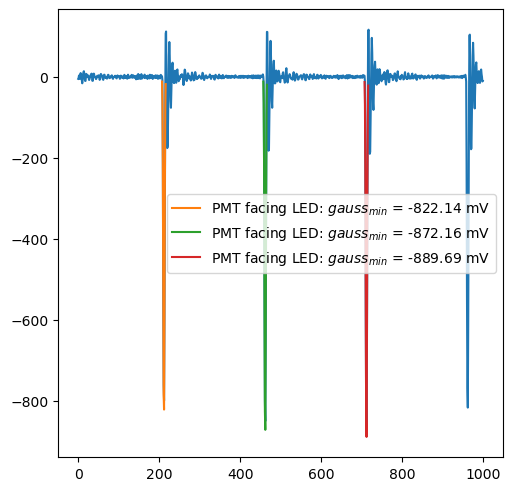

In [10]:
fig, ax = plt.subplots(1,1, constrained_layout=True)

frame = 50
# data_slice = data_pmt_led[:1000, 2]
data_slice = data_pmt_led[1000*(frame):1000*(frame + 1), 2]
ax.plot(data_slice)
ax.set_aspect('equal')

fit_range = 5

for i in range(1, 4):

#     data_region = data_slice[220*i:200*(i+1)]
#     data_region = data_slice[220*i:220*(i+1)]
    offset = int(np.where(data_slice == data_slice[200*i:200*(i+1)].min())[0])
    data_region = data_slice[offset - fit_range : offset + fit_range]
    x_ax = range(len(data_region))

    # negative gaussian fit
    popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
#     popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
    a, mu, sigma = popt
    best_fit_line = gauss_neg(x_ax, a, mu, sigma)

#     x_ax = range(220*i, len(data_region) + 220*i)
#     x_ax = range(offset*i, len(data_region) + offset*i)
    x_ax = range(offset - fit_range, len(data_region) + offset - fit_range)

    ax.plot(x_ax, best_fit_line, label='PMT facing LED: $gauss_{min}$ = %.2f mV' %(best_fit_line.min()))
    ax.legend(fontsize=10, loc='best')


In [38]:
# fig, ax = plt.subplots(1,1, constrained_layout=True)

# frame = 50
frame_max = 1998

gauss_min = []
gauss_peak_pos = []

for frame in range(frame_max):
    
    data_slice = data_pmt_led[1000*(frame):1000*(frame + 1), 2]
    # ax.plot(data_slice)

    fit_range = 5

    for i in range(1, 4):

        offset = 200*i + int(np.where(data_slice[200*i:200*(i+1)] == data_slice[200*i:200*(i+1)].min())[0])
        data_region = data_slice[offset - fit_range : offset + fit_range]
        x_ax = range(len(data_region))

        # negative gaussian fit
        popt, pcov = scipy.optimize.curve_fit(gauss_neg, x_ax, data_region) 
    #     popt, pcov = scipy.optimize.curve_fit(gauss_neg, range(len(data_region)), data_region, p0=[3e6, 1e4, 5e2]) 
        a, mu, sigma = popt
        best_fit_line = gauss_neg(x_ax, a, mu, sigma)
        
        best_min = best_fit_line.min()

        gauss_min.append(best_min)
        gauss_peak_pos.append(frame)

    #     x_ax = range(220*i, len(data_region) + 220*i)
    #     x_ax = range(offset*i, len(data_region) + offset*i)
#         x_ax = range(offset - fit_range, len(data_region) + offset - fit_range)

#         ax.plot(x_ax, best_fit_line, label='PMT facing LED: $gauss_{min}$ = %.2f mV' %(best_fit_line.min()))
#         ax.legend(fontsize=10, loc='best')


gauss_min = np.array(gauss_min)
gauss_peak_pos = np.array(gauss_peak_pos)

gauss_min.mean()

-873.6751316354163

In [32]:
np.where(data_slice[200*i:200*(i+1)] == data_slice[200*i:200*(i+1)].min())[0][0], np.where(data_slice == data_slice[200*i:200*(i+1)].min())[0] 

(13, array([213, 963]))

In [30]:
i

1

In [36]:
gauss_min[np.where(gauss_min > -400.)], len(gauss_min[np.where(gauss_min > -400.)])

(array([], dtype=float64), 0)